# Importing Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import os
import glob

# **Reading the Data Images**

In [11]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# **Loading the Dataset**

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
train = get_training_data('/content/drive/MyDrive/XRAY/chest_xray/chest_xray/train')
test = get_training_data('/content/drive/MyDrive/XRAY/chest_xray/chest_xray/test')
val = get_training_data('/content/drive/MyDrive/XRAY/chest_xray/chest_xray/val')

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-11-b2613b36a4a4>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



# **Data Visualization & Preprocessing**

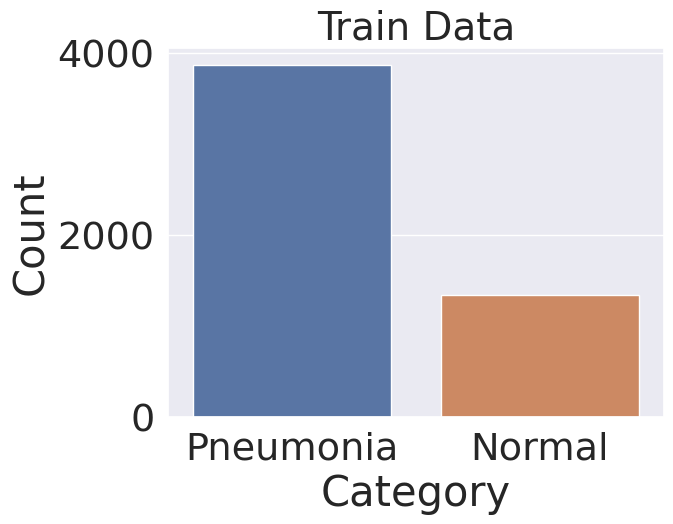

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = np.unique(l, return_counts=True)

# Plot the countplot using the computed values
sns.countplot(x=l)
plt.title("Train Data", fontsize=28)
plt.xlabel("Category")
plt.ylabel("Count")
plt.savefig("train-count-plot-disease.pdf", dpi=600, bbox_inches="tight")
plt.show()

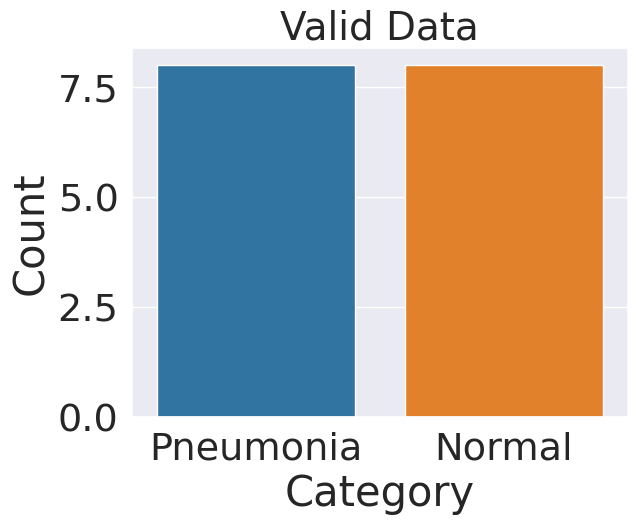

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = pd.Series(l).value_counts()

# Plot the countplot using the computed values
sns.countplot(x=l, palette="tab10")
plt.title("Valid Data", fontsize=28)
plt.xlabel("Category")
plt.ylabel("Count")
plt.savefig("valid-count-plot-disease.pdf", dpi=600, bbox_inches="tight")
plt.show()

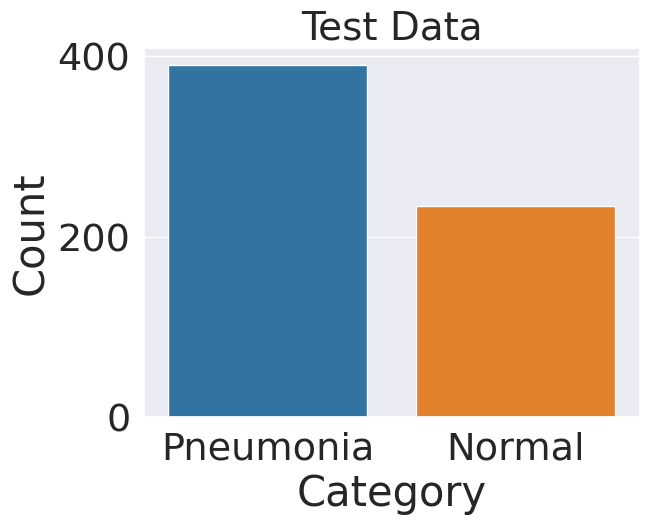

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = pd.Series(l).value_counts()

# Plot the countplot using the computed values
sns.countplot(x=l, palette="tab10")
plt.title("Test Data", fontsize=28)
plt.xlabel("Category")
plt.ylabel("Count")
plt.savefig("test-count-plot-disease.pdf", dpi=600, bbox_inches="tight")
plt.show()

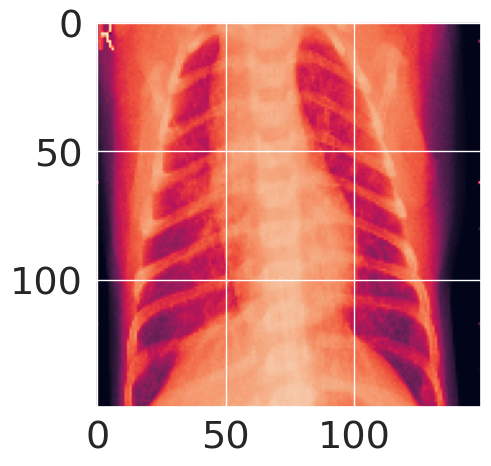

In [21]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0])

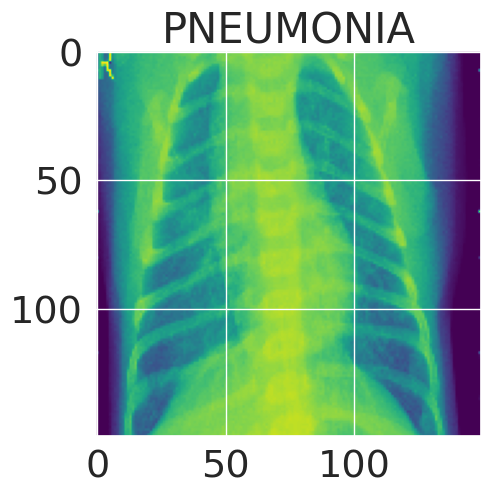

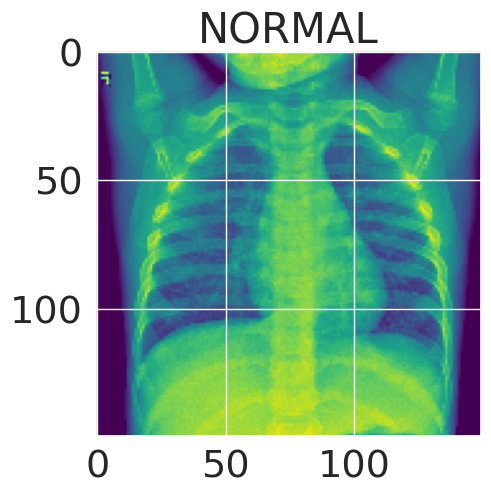

In [22]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='viridis')
plt.title(labels[train[0][1]])
plt.savefig("diseased-lung.pdf",dpi=600, bbox_inches="tight")
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='viridis')
plt.title(labels[train[-1][1]])
plt.savefig("healthy-lung.pdf",dpi=600, bbox_inches="tight")

In [23]:
x_train = []
y_train = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

x_val = []
y_val = []    

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

x_test = []
y_test = []    
    
for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [24]:
len(train)

5202

In [25]:
len(test)

624

In [26]:
len(val)

16

## Applying Blur
This code segment reads in 4 images of normal chest x-rays, resizes and converts them to RGB format. It then applies three different background subtraction techniques to each image: Gaussian blur, Median blur, and Average blur. The resulting images are stored in a list and plotted in a 3x4 grid using matplotlib. The titles of the first three images in each row correspond to the background subtraction techniques applied to the image.

In [43]:
import glob

# ...

images = []
normal_files = (glob.glob("/content/drive/MyDrive/XRAY/chest_xray/chest_xray/train/NORMAL*.jpeg"))

if len(normal_files) > 0:
    for i in range(4):
        if i < len(normal_files):
            image = cv2.imread(normal_files[i])
            image = cv2.resize(image, (512, 512))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_gaussian = subtract_gaussian_bg_image(image)
            images.append(image_gaussian)
            image_median = subtract_median_bg_image(image)
            images.append(image_median)
            image_average = subtract_average_bg_image(image)
            images.append(image_average)

    fig = plt.figure(figsize=(15, 15))
    columns = 3
    rows = 4

    titles = ["Gaussian Blur", "Median Blur", "Average Blur"]
    for i, image in enumerate(images):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(image)
        plt.axis(False)
        if i < 3:
            plt.title(titles[i])

    plt.show()
else:
    print("No normal images found.")


No normal images found.


In [44]:
def subtract_gaussian_bg_image(image):
    k_size = int(np.max(image.shape)/10)
    blurred = cv2.GaussianBlur(image, (0,0), k_size)
    return cv2.addWeighted(image, 4, blurred, -4, 128)

def subtract_median_bg_image(image):
    k_size = int(np.max(image.shape)//20)*2+1
    blurred = cv2.medianBlur(image, k_size)
    return cv2.addWeighted(image, 4, blurred, -4, 128)

def subtract_average_bg_image(image):
    blurred = cv2.blur(image, (10,10))
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    return gray

import glob
images = []
for i in range(4):
    image = cv2.imread(glob.glob("/content/drive/MyDrive/XRAY/chest_xray/chest_xray/train/NORMAL*.jpeg"))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gaussian = subtract_gaussian_bg_image(image)
    images.append(image_gaussian)
    image_median = subtract_median_bg_image(image)
    images.append(image_median)
    image_average = subtract_average_bg_image(image)
    images.append(image_average)

fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 4

titles = ["Gaussian Blur", "Median Blur", "Average Blur"]
for i, image in enumerate(images):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
    plt.axis(False)
    if i<3:
        plt.title(titles[(i)])

TypeError: ignored

## Applying different transformation
This code segment reads in 4 images of normal chest x-rays and applies a series of image processing techniques to each image. These techniques include Affine Transformation, Rotation, Resize, and Colormap application. The resulting images are stored in a list and plotted in a 4x4 grid using matplotlib. The titles of the first four images in each column correspond to the image processing techniques applied to the image.

In [40]:
def apply_affine_tf(img, pts1, pts2):
    M = cv2.getAffineTransform(pts1, pts2)
    return cv2.warpAffine(img, M, img.shape[:2])

def apply_rotation(img, angle=90):
    return cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)

def apply_resize(img, width=780, height=540):
    return cv2.resize(img, (width, height), interpolation=cv2.INTER_NEAREST)

def apply_colormap(img, colormap=cv2.COLORMAP_JET):
    return cv2.applyColorMap(img, colormap)

def process_image(img_path):
    img = cv2.imread(img_path)
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
    img_arr = []
    img_arr.append(apply_affine_tf(img, pts1, pts2))
    img_arr.append(apply_rotation(img))
    img_arr.append(apply_resize(img))
    img_arr.append(apply_colormap(img))
    return img_arr

def plot_images(img_arr):
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
    axs = axs.flatten()
    titles = ["Affine Transform", "Rotation", "Resize", "Colormap"]
    for i, img in enumerate(img_arr):
        axs[i].imshow(img)
        axs[i].axis(False)
        if i < 4:
            axs[i].set_title(titles[i])

img_arr = []
img_paths = glob.glob("/content/drive/MyDrive/XRAY/chest_xray/chest_xray/train/NORMAL/*.jpeg")[:4]
for img_path in img_paths:
    img_arr.extend(process_image(img_path))
    
plot_images(img_arr)

AttributeError: ignored